In [16]:
#%%
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from models.elm import ELMClassifier, ELMRegressor
from models.perceptron import PerceptronClassifier
from models.rbf import RBFClassifier, RBFRegressor
from models.elm_hebbian import ELMHebbianClassifier, ELMHebbianRegressor
from models.adaline import Adaline
from sklearn.datasets import load_digits, load_breast_cancer, load_wine, load_boston, load_diabetes, load_iris, make_blobs, make_moons
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, mean_squared_error

#%% 
# blobs
X, y = make_blobs(n_features=2, centers=[[2,2], [4,4]], random_state=1234)
y = pd.Series(y).map({0:-1,1:1}).to_numpy()

Xm, ym = make_moons(random_state=1234, noise=0.2)
ym = pd.Series(ym).map({0:-1,1:1}).to_numpy()






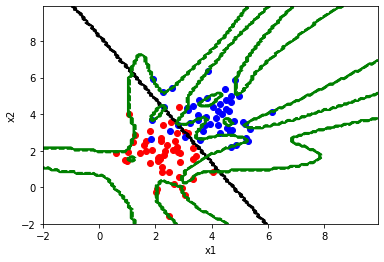

In [17]:
#%%
# train
heb = ELMHebbianClassifier(100).fit(X, y)
elm = ELMClassifier(100).fit(X, y)

# and plot
fig, ax = plt.subplots()

t_class0 = y == -1
t_class1 = y == 1
ax.scatter(X[t_class0, 0], X[t_class0, 1], color='red')
ax.scatter(X[t_class1, 0], X[t_class1, 1], color='blue')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

x1 = np.arange(-2, 10, step=0.1)
x2 = np.arange(-2, 10, step=0.1)

xx, yy = np.meshgrid(x1, x2)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
y_heb = heb.predict(grid)
y_elm = elm.predict(grid)

zz_heb = y_heb.reshape(xx.shape)
zz_elm = y_elm.reshape(xx.shape)

ax.contour(xx, yy, zz_heb, colors=['black'])
ax.contour(xx, yy, zz_elm, colors=['green'])

fig.show()

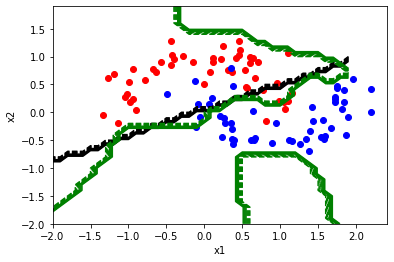

In [18]:
#%%
# train
heb = ELMHebbianClassifier(100).fit(Xm, ym)
elm = ELMClassifier(100).fit(Xm, ym)

# and plot
fig, ax = plt.subplots()

t_class0 = ym == -1
t_class1 = ym == 1
ax.scatter(Xm[t_class0, 0], Xm[t_class0, 1], color='red')
ax.scatter(Xm[t_class1, 0], Xm[t_class1, 1], color='blue')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

x1 = np.arange(-2, 2, step=0.1)
x2 = np.arange(-2, 2, step=0.1)

xx, yy = np.meshgrid(x1, x2)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
y_heb = heb.predict(grid)
y_elm = elm.predict(grid)

zz_heb = y_heb.reshape(xx.shape)
zz_elm = y_elm.reshape(xx.shape)

ax.contour(xx, yy, zz_heb, colors=['black'])
ax.contour(xx, yy, zz_elm, colors=['green'])

fig.show()